<a href="https://colab.research.google.com/github/rayrishiraj/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERFORMED BY: RISHIRAJ RAY

Problem Statement:

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.



In [ ]:
#importing liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
#loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
df.pop("car_ID")
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 25)

In [ ]:
#Looking for Data Standardization
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#Briefing Data
for i in df:
    print(i," ",df[i].describe())
    print("\n")

symboling   count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64


CarName   count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object


fueltype   count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object


aspiration   count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object


doornumber   count      205
unique       2
top       four
freq       115
Name: doornumber, dtype: object


carbody   count       205
unique        5
top       sedan
freq         96
Name: carbody, dtype: object


drivewheel   count     205
unique      3
top       fwd
freq      120
Name: drivewheel, dtype: object


enginelocation   count       205
unique        2
top       front
freq        202
Name: enginelocation, dtype: object


wheelbase   count    

In [ ]:
#Seggragating Data
cat_feature=[ft for ft in df.columns if df[ft].dtype=='O']
num_feature=[ft for ft in df.columns if df[ft].dtype!='O']

In [ ]:
print(cat_feature)
print(num_feature)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


<Axes: >

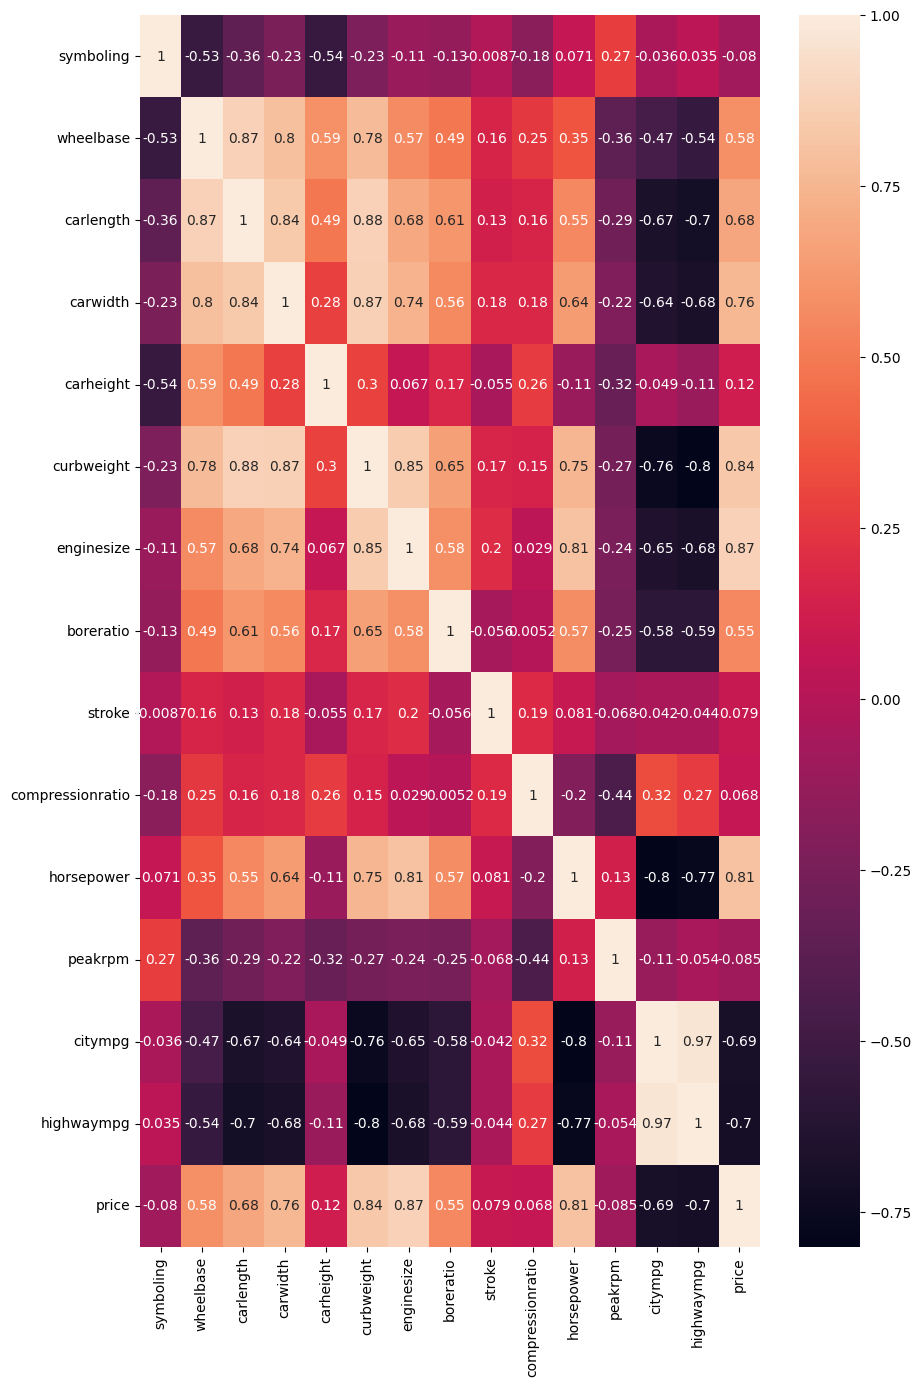

In [ ]:
#Feature Selection
plt.figure(figsize=(10, 16))
sns.heatmap(df[num_feature].corr(),annot=True)

<ipython-input-16-07d1bdb7051b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[['price']]


<Axes: >

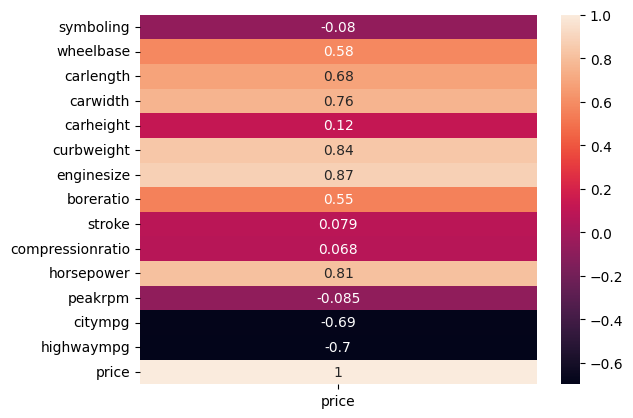

In [ ]:
#Feature Selection
corr = df.corr()[['price']]
sns.heatmap(corr, annot=True)

In [ ]:
# imp_num_feature=['carlength', 'carwidth','curbweight', 'enginesize','horsepower', 'peakrpm']
imp_num_feature=['symboling', 'wheelbase', 'carlength', 'carwidth',
                'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [ ]:
feature=imp_num_feature+cat_feature
X=df[feature]
y=df['price']

In [ ]:
from sklearn.impute import SimpleImputer #Handling Missing values
from sklearn.preprocessing import StandardScaler #Feature Scaling
from sklearn.preprocessing import OneHotEncoder

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Numerical pipeline
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())

    ]
)

# Categorical pipeline
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ('scaler',StandardScaler())

    ]
)


preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,imp_num_feature),
    ('cat_pipeline',cat_pipeline,cat_feature)
])

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
#preprocessing
# Applying the pipelines to train_set and test_test
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# model training
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)   R2:  0.8867825185215018


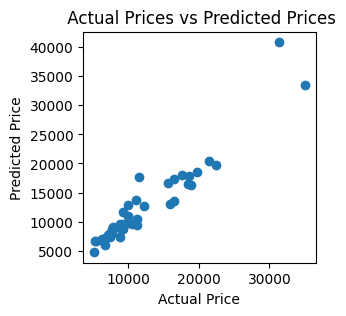



AdaBoostRegressor()   R2:  0.9051099731998452


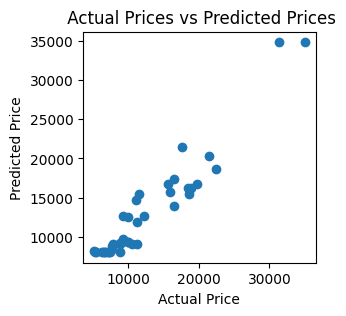



GradientBoostingRegressor()   R2:  0.9292047904261049


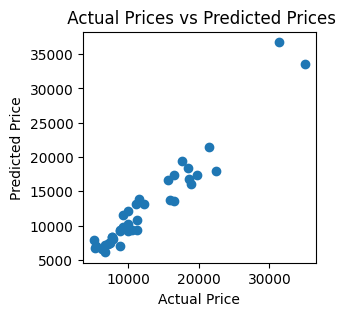



Ridge()   R2:  0.7434002933329897


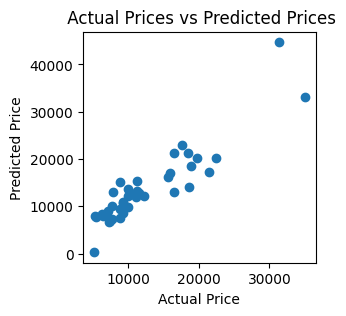



Lasso()   R2:  0.4775409473567842


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.301e+06, tolerance: 1.115e+06
  model = cd_fast.enet_coordinate_descent(


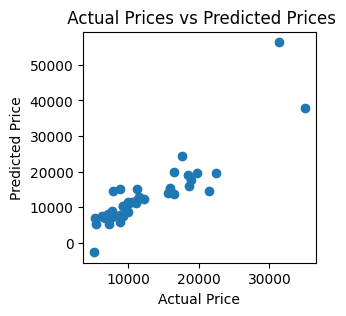



ElasticNet()   R2:  0.8741689368818063


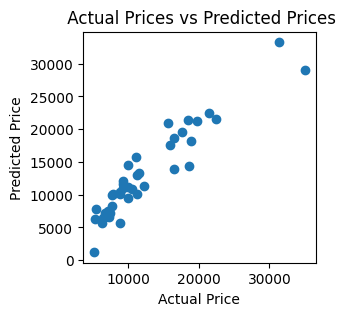

In [ ]:
model=[XGBRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),
        Ridge(),Lasso(),ElasticNet()]
for i in model:
    curr_model=i
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(i," ","R2: ",r2_score(y_test,y_pred))
    plt.figure(figsize=(3,3))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(" Actual Prices vs Predicted Prices")
    plt.show()
    print("\n")

Conclusion

Best R2 Score: GradientBoostingRegressor(): 0.932427522285299